# Hello

Welcome to the SME Pavement Crack Detection Interactive Notebook. Please run the following code to import all of the functions.

In [1]:
import numpy as np
import os
from skimage import io
from skimage.filters import threshold_multiotsu
from src.CreatePaths import createPaths
from src.LoadImage import loadImage
from src.SaveCutImages import saveCutImages
from src.ThresholdCutImages import thresholdCutImages
from src.SaveThresholdedImages import saveThresholdedImages
from src.HeatImage import heatImage
# We do not need argparser since this is interactive.
# from src.ArgParser import parseArgs
from src.TestImages import loadLabeledImages, saveLabeledCutImages, testImages
from src.SaveDictionary import saveDictionary

# Globals

The following are definitions of global paramters. Change them as need be, but best to leave them alone.

In [2]:
# Feel free to change
DIVIDE_X = 25  # Number of divisions on one of axies
DIVIDE_Y = 25  # Number of diisions on other axis

# Try not to change
dir_path = os.path.realpath('.')  # The directory of the project.

# Do not change
thresholding_function = threshold_multiotsu  # Function for thresholding.


# Creating Paths

The following code is to create the different sub folders that will be required to run the rest of the code.

In [19]:
IMAGES = os.listdir(os.path.join(dir_path , "data" , "raw_images"))

required_paths = [  # The folders that must exist.
    os.path.realpath("\\data"),
    os.path.realpath("\\data\\raw_images"),  # Where the .tif files will be stored.
    os.path.realpath("\\results"),
]
createPaths(required_paths, dir_path)

In [5]:
image_dict = {}
for image in IMAGES:
    # Name the image
    image_dict[image] = {}
    image_dict[image]["file_name"] = image  # Redundent for the sake of clarity
    image_dict[image]["name"] = image.split('.')[0]  # Without the .tif
    
    # Name the paths
    image_dict[image]["raw_path"] = os.path.join("data" , "raw_images", image_dict[image]["file_name"])
    image_dict[image]["cut_path"] = os.path.join("results" , image_dict[image]["name"], "raw_cut_images")
    image_dict[image]["thresholded_cut_path"] = os.path.join("results" ,  image_dict[image]["name"] , "thresholded_cut_images")
    image_dict[image]["labeled_cut_path"] = os.path.join("results" ,  image_dict[image]["name"] , "labeled_cut_images")

In [6]:
for key in image_dict:
    required_paths.append(image_dict[image]["cut_path"])
    required_paths.append(image_dict[image]["thresholded_cut_path"])
    required_paths.append(image_dict[image]["labeled_cut_path"])
createPaths(required_paths, dir_path)

# Cut and Threshold Images

Running the cell below will cut and threshold the images insdie of the `data/raw_images` folder.

In [7]:
for key in image_dict:
    image_dict[key]["cut_image_dict"] = loadImage(image_dict[key]["raw_path"], DIVIDE_X, DIVIDE_Y)
    image_dict[key]["thresholded_dict"] = thresholdCutImages(image_dict[key]["cut_image_dict"], thresholding_function)

In [8]:
image_dict[IMAGES[0]].keys()

dict_keys(['file_name', 'name', 'raw_path', 'cut_path', 'thresholded_cut_path', 'labeled_cut_path', 'cut_image_dict', 'thresholded_dict'])

After running the cell above, the image has now been cut and thresholded. You may want to run the cell below in order to save the cut images and the thresholded images in their respective paths.

In [9]:
# Saves the cut images
saveDictionary(image_dict[key]["cut_image_dict"], dir_path, image_dict[key]["cut_path"], "cut_image")

In [10]:
saveDictionary(image_dict[key]["thresholded_dict"], dir_path, image_dict[key]["thresholded_cut_path"], "cut_image")

/Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/src/SaveDictionary.py:16: UserWarning: /Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/results/Kzoo_Office_v5_orthomosaic/thresholded_cut_images/cut_image_0000.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(os.path.join(dir_path, folder, file_name), dictionary[key], check_contrast=False)
/Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/src/SaveDictionary.py:16: UserWarning: /Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/results/Kzoo_Office_v5_orthomosaic/thresholded_cut_images/cut_image_0001.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(os.path.join(dir_path, folder, file_name), dictionary[key], check_contrast=False)
/Users/daniel.villalba2lcecorp.com/r

/Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/src/SaveDictionary.py:16: UserWarning: /Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/results/Kzoo_Office_v5_orthomosaic/thresholded_cut_images/cut_image_0306.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(os.path.join(dir_path, folder, file_name), dictionary[key], check_contrast=False)
/Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/src/SaveDictionary.py:16: UserWarning: /Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/results/Kzoo_Office_v5_orthomosaic/thresholded_cut_images/cut_image_0307.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(os.path.join(dir_path, folder, file_name), dictionary[key], check_contrast=False)
/Users/daniel.villalba2lcecorp.com/r

/Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/src/SaveDictionary.py:16: UserWarning: /Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/results/Kzoo_Office_v5_orthomosaic/thresholded_cut_images/cut_image_0800.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(os.path.join(dir_path, folder, file_name), dictionary[key], check_contrast=False)
/Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/src/SaveDictionary.py:16: UserWarning: /Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/results/Kzoo_Office_v5_orthomosaic/thresholded_cut_images/cut_image_0801.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(os.path.join(dir_path, folder, file_name), dictionary[key], check_contrast=False)
/Users/daniel.villalba2lcecorp.com/r

/Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/src/SaveDictionary.py:16: UserWarning: /Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/results/Kzoo_Office_v5_orthomosaic/thresholded_cut_images/cut_image_1218.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(os.path.join(dir_path, folder, file_name), dictionary[key], check_contrast=False)
/Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/src/SaveDictionary.py:16: UserWarning: /Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/results/Kzoo_Office_v5_orthomosaic/thresholded_cut_images/cut_image_1219.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(os.path.join(dir_path, folder, file_name), dictionary[key], check_contrast=False)
/Users/daniel.villalba2lcecorp.com/r

/Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/src/SaveDictionary.py:16: UserWarning: /Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/results/Kzoo_Office_v5_orthomosaic/thresholded_cut_images/cut_image_1701.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(os.path.join(dir_path, folder, file_name), dictionary[key], check_contrast=False)
/Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/src/SaveDictionary.py:16: UserWarning: /Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/results/Kzoo_Office_v5_orthomosaic/thresholded_cut_images/cut_image_1702.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(os.path.join(dir_path, folder, file_name), dictionary[key], check_contrast=False)
/Users/daniel.villalba2lcecorp.com/r

/Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/src/SaveDictionary.py:16: UserWarning: /Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/results/Kzoo_Office_v5_orthomosaic/thresholded_cut_images/cut_image_2021.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(os.path.join(dir_path, folder, file_name), dictionary[key], check_contrast=False)
/Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/src/SaveDictionary.py:16: UserWarning: /Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/results/Kzoo_Office_v5_orthomosaic/thresholded_cut_images/cut_image_2022.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(os.path.join(dir_path, folder, file_name), dictionary[key], check_contrast=False)
/Users/daniel.villalba2lcecorp.com/r

/Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/src/SaveDictionary.py:16: UserWarning: /Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/results/Kzoo_Office_v5_orthomosaic/thresholded_cut_images/cut_image_2302.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(os.path.join(dir_path, folder, file_name), dictionary[key], check_contrast=False)
/Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/src/SaveDictionary.py:16: UserWarning: /Users/daniel.villalba2lcecorp.com/repos/school/Pavement-Crack-Detection/results/Kzoo_Office_v5_orthomosaic/thresholded_cut_images/cut_image_2303.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(os.path.join(dir_path, folder, file_name), dictionary[key], check_contrast=False)
/Users/daniel.villalba2lcecorp.com/r

# Create heatmap

In [11]:
for key in image_dict:
    image_dict[key]["heat"] = heatImage(image_dict[key]["thresholded_dict"])

In [12]:
heatmap = np.zeros((25,25))
for another_key in image_dict[key]["heat"]:
    heatmap[another_key[0],another_key[1]] = image_dict[key]["heat"][another_key]

In [13]:
import matplotlib.pyplot as plt

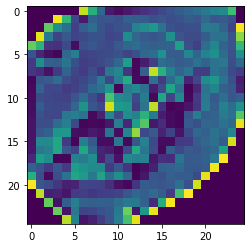

In [14]:
plt.imshow(heatmap)

# Temporary Functions

These functions are temporarily stored down here. This allows rapid prototyping by keeping functions being worked on inside the same file as the interactive code. These should be ran immediately after the imports.

In [15]:
# Temporary cell for debugging these functions

def loadLabeledImages(path, images, color=(0,0,0,255)):
    """
    Loads in the the hand traced images and creates a binary image 
    of black pixels vs rest
    Args:
        path - the path to the folder containing ONLY the images.
        images - the path to the file containing the images labeled.
        color - the color the images were labeled in.
    """
    text = open(images,'r')
    labeled_images = [line for line in text.readlines() ]

    labeled_image_dict = {}
    for file in os.listdir(path):
        if file[-4:] in labeled_images:
            key = (int(file[-4:-2]), int(file[-2:]))
            img = io.imread(path + '/' + file)
            labeled_image_dict[key] = img == color
    return labeled_image_dict

def saveLabeledCutImages(labeled_image_dict, dir_path):
    for key in labeled_image_dict:
        name = "{:02d}{:02d}".format(key[0], key[1])
        io.imsave(dir_path + "/results/labeled_cut_images/labeled_img_" + name + ".tif", labeled_image_dict[key], check_contrast=False)
    return None

def testImages(labeled_image_dict, thresholded_dict):
    score_dict = {}
    for key in labeled_image_dict:
        lt = labeled_image_dict[key]
        tt = thresholded_dict[key]
        union = lt | tt
        intersection = lt & tt
        ans = intersection / union 
        score_dict[key] = ans
    return score_dict
    